In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:\\Users\\sheshu\\Downloads\\Social_Network_Ads.csv")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [5]:
pd.read_csv("C:\\Users\\sheshu\\Downloads\\Social_Network_Ads.csv")

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
data.value_counts()

User ID   Gender  Age  EstimatedSalary  Purchased
15815236  Female  45   131000           1            1
15566689  Female  35   57000            0            1
15569641  Female  58   95000            1            1
15570769  Female  26   80000            0            1
15570932  Male    34   115000           0            1
                                                    ..
15579781  Female  29   47000            0            1
15581198  Male    31   74000            0            1
15581282  Male    37   74000            0            1
15581654  Female  34   43000            0            1
15582066  Male    40   78000            0            1
Name: count, Length: 400, dtype: int64

In [7]:
data = data.drop(columns=["User ID"])
data.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [8]:
data["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

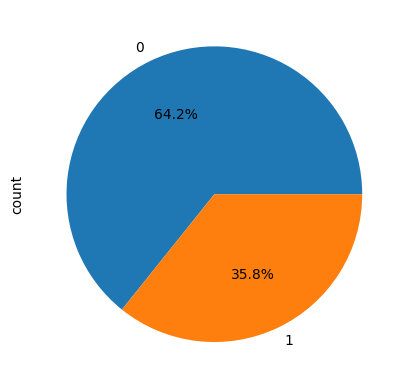

In [9]:
data["Purchased"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

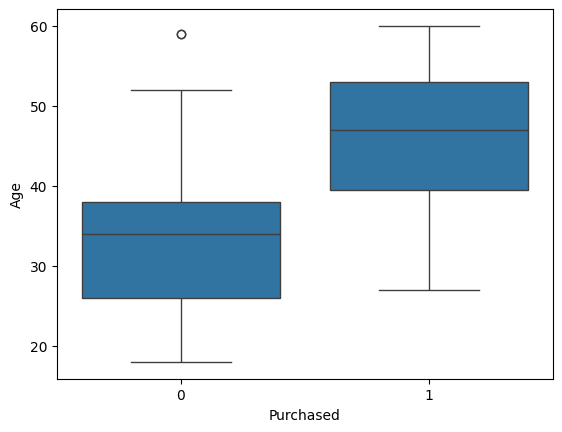

In [10]:
sns.boxplot(x="Purchased", y="Age", data=data) 
plt.show()

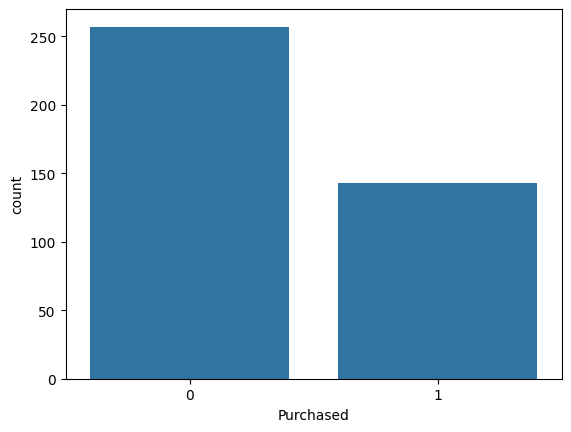

In [11]:
sns.countplot(x="Purchased", data=data)
plt.show()

C:\Users\sheshu\AppData\Local\Temp\ipykernel_15624\1779254536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Age"])


<Axes: xlabel='Age', ylabel='Density'>

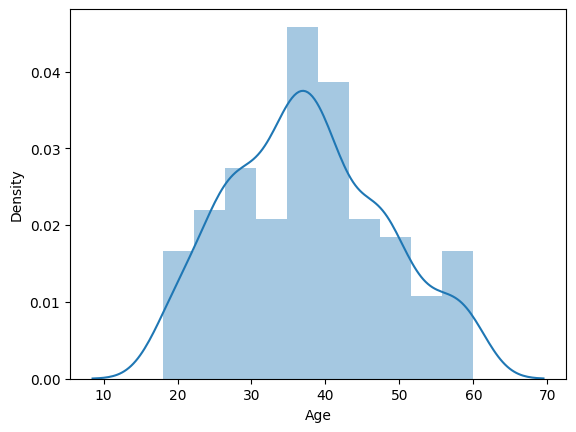

In [12]:
sns.distplot(data["Age"])

In [13]:
Q1 = data["Age"].quantile(0.25)
Q2 = data["Age"].quantile(0.5)
Q3 = data["Age"].quantile(0.75)
outline = Q3 - Q1
print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)
print("Outline:", outline)

Q1: 29.75
Q2: 37.0
Q3: 46.0
Outline: 16.25


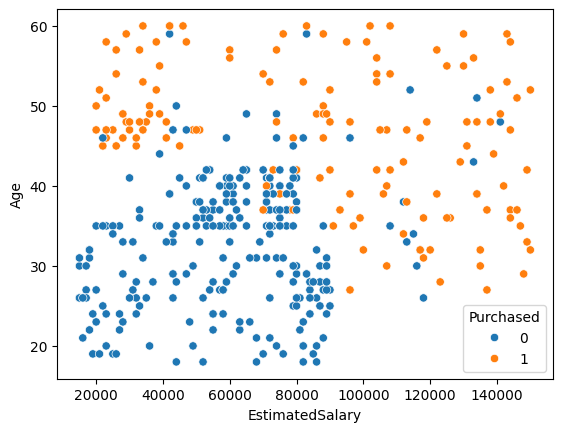

In [14]:
sns.scatterplot(data=data, x="EstimatedSalary", y="Age", hue="Purchased")
plt.show()

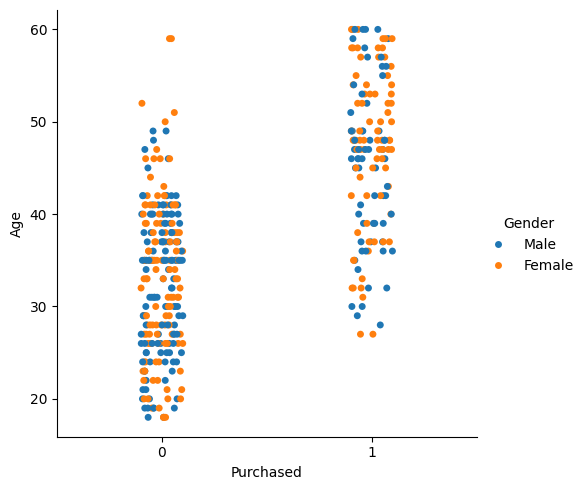

In [15]:
sns.catplot(data=data, x="Purchased", y="Age", hue="Gender")
plt.show()

In [16]:
data_corr = data.select_dtypes(include=["number"]).corr()
print(data_corr)

                      Age  EstimatedSalary  Purchased
Age              1.000000         0.155238   0.622454
EstimatedSalary  0.155238         1.000000   0.362083
Purchased        0.622454         0.362083   1.000000


<Axes: >

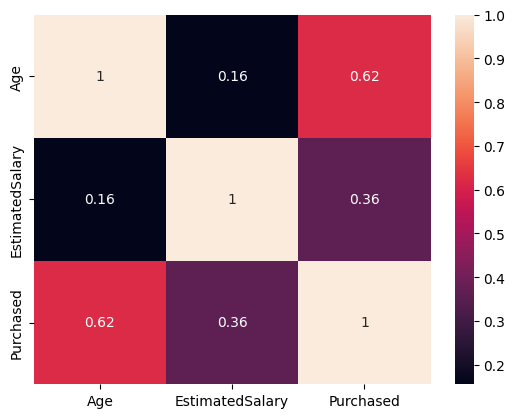

In [17]:
sns.heatmap(data_corr, annot=True)

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [19]:
X = data[["Age", "EstimatedSalary"]]
y = data["Purchased"]

lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

Coefficients: [2.65605047e-02 3.82813004e-06]
Intercept: -0.9096191649615732


In [20]:
mean_values = data.mean(numeric_only=True)
median_values = data.median(numeric_only=True)
mode_values = data.mode(numeric_only=True).iloc[0]  # mode() returns a DataFrame; we take the first mode

print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)

Mean:
 Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

Median:
 Age                   37.0
EstimatedSalary    70000.0
Purchased              0.0
dtype: float64

Mode:
 Age                   35
EstimatedSalary    72000
Purchased              0
Name: 0, dtype: int64


In [21]:
age_fare_data = pd.DataFrame()
age_fare_data["EstimatedSalary"] = data["EstimatedSalary"]
age_fare_data["Age"] = data["Age"]
age_fare_data.describe()

,EstimatedSalary,Age
count,400.000000,400.000000
mean,69742.500000,37.655000
std,34096.960282,10.482877
min,15000.000000,18.000000
25%,43000.000000,29.750000
50%,70000.000000,37.000000
75%,88000.000000,46.000000
max,150000.000000,60.000000


C:\Users\sheshu\AppData\Local\Temp\ipykernel_15624\831352505.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, color='skyblue')


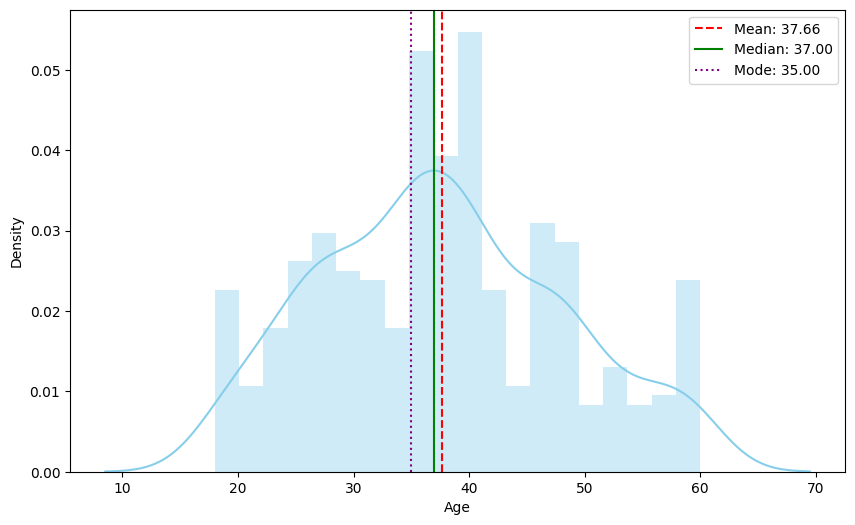

In [22]:
column = "Age"

mean_val = data[column].mean()
median_val = data[column].median()
mode_val = data[column].mode()[0]

plt.figure(figsize=(10, 6))
sns.distplot(data[column], bins=20, kde=True, color='skyblue')

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='purple', linestyle=':', label=f'Mode: {mode_val:.2f}')

plt.legend()

C:\Users\sheshu\AppData\Local\Temp\ipykernel_15624\2850692361.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column], bins=20, kde=True, color='skyblue')


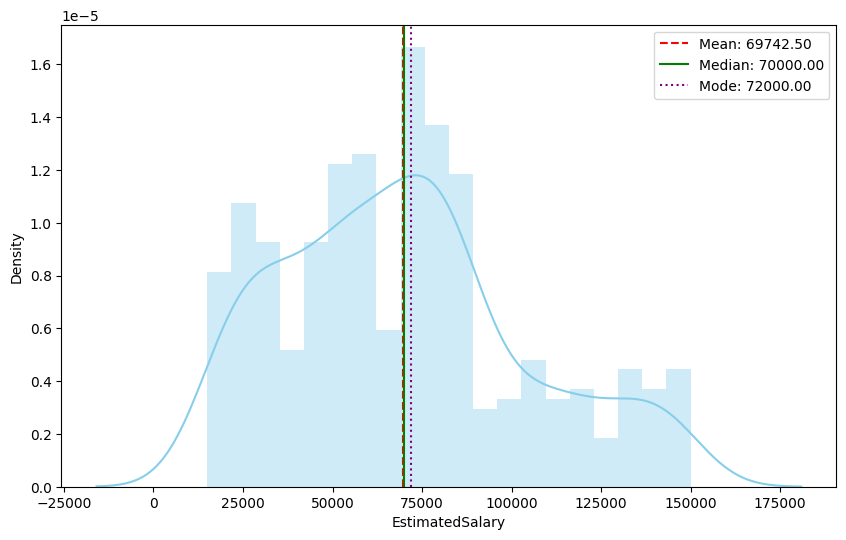

In [23]:
column = "EstimatedSalary"
mean_val = data[column].mean()
median_val = data[column].median()
mode_val = data[column].mode()[0]

plt.figure(figsize=(10, 6))
sns.distplot(data[column], bins=20, kde=True, color='skyblue')

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
plt.axvline(mode_val, color='purple', linestyle=':', label=f'Mode: {mode_val:.2f}')

plt.legend()

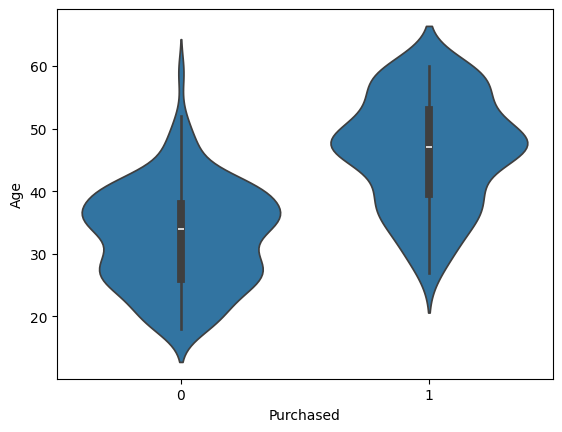

In [24]:
sns.violinplot(x="Purchased", y="Age", data=data)
plt.show()

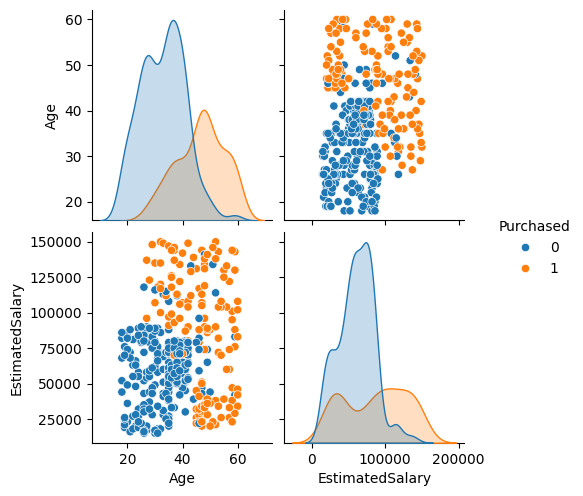

In [25]:
sns.pairplot(data, hue="Purchased", diag_kind="kde")
plt.show()

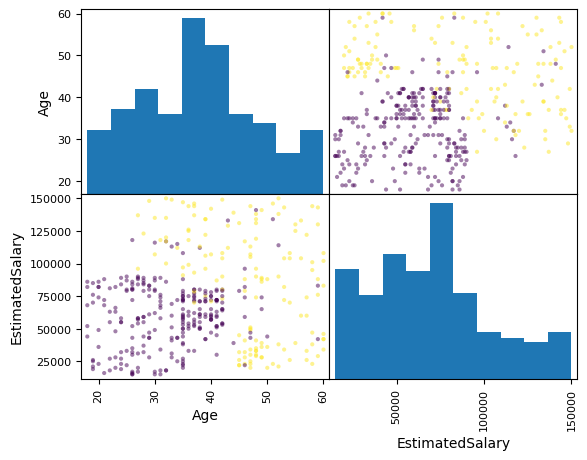

In [26]:
attributes = ["Age", "EstimatedSalary"]
scatter_matrix = pd.plotting.scatter_matrix(data[attributes], c=data["Purchased"])
plt.show()

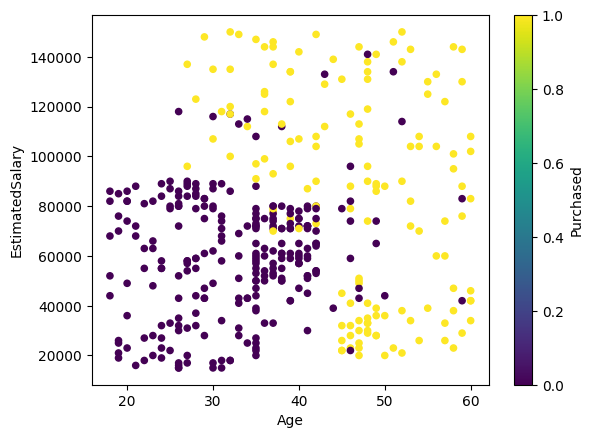

In [27]:
data.plot(kind="scatter", x="Age", y="EstimatedSalary", c="Purchased", colormap='viridis')
plt.show()

C:\Users\sheshu\AppData\Local\Temp\ipykernel_15624\3061368143.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


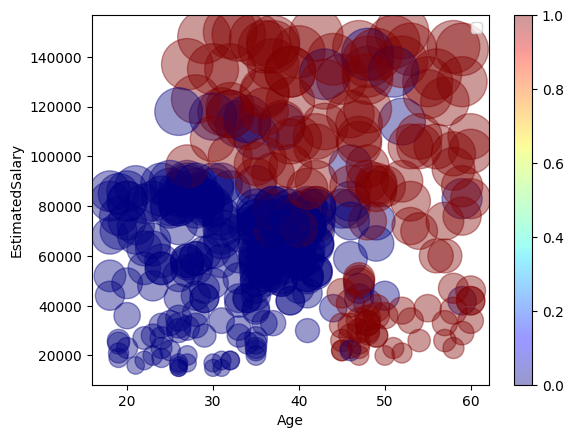

In [40]:
data.plot(kind="scatter", x="Age", y="EstimatedSalary", alpha=0.4,s=data["EstimatedSalary"]/100,c=data["Purchased"], cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

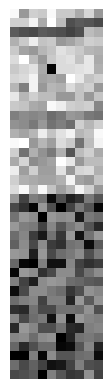

In [48]:
plt.imshow(data["Age"].values.reshape(-1, 10), cmap = plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

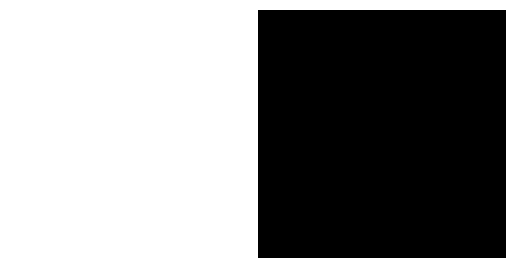

In [54]:
X = data[["Age", "EstimatedSalary"]].values
X = X.reshape(X.shape[0], X.shape[1], 1)
plt.imshow(X[0].reshape(1, -1), cmap=plt.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()